<a href="https://colab.research.google.com/github/jaksonvelasquez/cun/blob/main/ACA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONECTAR A GOOGLE DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LEER LOS ARCHIVOS DE GITHUB**

In [ ]:
import pandas as pd

# URLs de los archivos en formato 'raw'
url_octubre = 'https://raw.githubusercontent.com/jaksonvelasquez/cun/main/octubre2023.csv'
url_septiembre = 'https://raw.githubusercontent.com/jaksonvelasquez/cun/main/septiembre2023.csv'

# Leer los archivos CSV
data_oct2023 = pd.read_csv(url_octubre)
data_sept2023 = pd.read_csv(url_septiembre)

# Mostrar las primeras filas para verificar
print(data_oct2023.head())
print(data_sept2023.head())

**LIMPIAR LOS DATOS** Para limpiar los datos, tendremos en cuenta que el campo CANTI= 0 y FOBDOL=0

In [4]:
import pandas as pd

# Asumiendo que ya has cargado los datos en data_oct2023 y data_sept2023

# Filtrar los dataframes para eliminar filas donde CANTI = 0 y FOBDOL = 0
data_oct2023 = data_oct2023[~((data_oct2023['CANTI'] == 0) & (data_oct2023['FOBDOL'] == 0))]
data_sept2023 = data_sept2023[~((data_sept2023['CANTI'] == 0) & (data_sept2023['FOBDOL'] == 0))]


# Crear nuevos dataframes con los datos limpios
data_oct2023_clean = data_oct2023[~((data_oct2023['CANTI'] == 0) & (data_oct2023['FOBDOL'] == 0))]
data_sept2023_clean = data_sept2023[~((data_sept2023['CANTI'] == 0) & (data_sept2023['FOBDOL'] == 0))]

# Guardar data_oct2023_clean como un archivo CSV
data_oct2023_clean.to_csv('data_oct2023_clean.csv', index=False)

# Guardar data_sept2023_clean como un archivo CSV
data_sept2023_clean.to_csv('data_sept2023_clean.csv', index=False)

 #verificar
print(data_oct2023.head())
print(data_sept2023.head())

   FECH  ADUA  PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
0  2310     1   249      USA         0     AXM     68    9      249      1   
1  2310     1   580      PAN         0     AXM     68    0      580      1   
2  2310     3    23      DEU         3     BOG      5    3       23      1   
3  2310     3    23      DEU         3     BOG      5    3       23      1   
4  2310     3    23      DEU         3     BOG      5    3       23      1   

   ...  CODUNI2  CANTI     PBK    PNK  FOBDOL     FOBPES  AGRENA FLETES  \
0  ...       M3    110  115667  88975  108083  457256555       0      0   
1  ...       M3     22   22674  17442   18547   78465124       0      0   
2  ...       KG    576     654    576    4476   18142684       0   1354   
3  ...       KG     84     101     84     525    2221070       0      0   
4  ...       KG     30      36     30     114     482290       0      0   

   SEGURO OTROSG  
0       0      0  
1       0      0  
2       0      0  
3   

**INSTALAR LIBRERIAS DE VISUALIZACIÓN**

In [27]:
!pip install numpy matplotlib seaborn

**CONVERTIMOS LA COLUMNA DE PAIS A STR Y LAS COLUMNAS DE PBK, PNK Y FOBDOL A ENTEROS PARA PODER AGRUPARLAS**

In [22]:
import pandas as pd

# Convertir COD_PAI4 a string
data_oct2023_clean['COD_PAI4'] = data_oct2023_clean['COD_PAI4'].astype(str)

# Convertir las columnas a enteros, asegurándose de que sean numéricas
cols_to_convert = ['PBK', 'PNK', 'FOBDOL']

for col in cols_to_convert:
    data_sept2023_clean[col] = pd.to_numeric(data_sept2023_clean[col], errors='coerce').fillna(0).astype(int)
    data_oct2023_clean[col] = pd.to_numeric(data_oct2023_clean[col], errors='coerce').fillna(0).astype(int)


**VISUALIZAR LOS PAISES CON MAYOR VALOR Y MAYOR CANTIDAD DE EXPORTACIONES, POR CADA MES**

In [25]:
import pandas as pd


# Agrupar por 'COD_PAI4' y calcular la suma de 'PBK', 'PNK' y 'FOBDOL' para SEPTIEMBRE
grouped_data_sept = data_sept2023_clean.groupby('COD_PAI4').agg(
    Suma_PBK=pd.NamedAgg(column='PBK', aggfunc='sum'),
    Suma_PNK=pd.NamedAgg(column='PNK', aggfunc='sum'),
    Suma_FOBDOL=pd.NamedAgg(column='FOBDOL', aggfunc='sum')
)

# Ordenar los resultados por 'Suma_FOBDOL' en orden descendente para SEPTIEMBRE
grouped_data_sept_sorted = grouped_data_sept.sort_values(by='Suma_FOBDOL', ascending=False)

# Mostrar el resultado SEPTIEMBRE
print("Resultados de Septiembre:")
print(grouped_data_sept_sorted)


# Agrupar por 'COD_PAI4' y calcular la suma de 'PBK', 'PNK' y 'FOBDOL' para OCTUBRE
grouped_data_oct = data_oct2023_clean.groupby('COD_PAI4').agg(
    Suma_PBK=pd.NamedAgg(column='PBK', aggfunc='sum'),
    Suma_PNK=pd.NamedAgg(column='PNK', aggfunc='sum'),
    Suma_FOBDOL=pd.NamedAgg(column='FOBDOL', aggfunc='sum')
)

# Ordenar los resultados por 'Suma_FOBDOL' en orden descendente para OCTUBRE
grouped_data_oct_sorted = grouped_data_oct.sort_values(by='Suma_FOBDOL', ascending=False)

# Mostrar el resultado OCTUBRE
print("Resultados de Octubre:")
print(grouped_data_oct_sorted)



Resultados de Septiembre:
            Suma_PBK    Suma_PNK  Suma_FOBDOL
COD_PAI4                                     
USA       1190692076  1183706419   1159013390
PAN       1006382152  1005437128    542093755
IND        317823113   317769704    244863100
MEX        633300352   631496449    171806503
BRA        362011068   360547069    163191378
...              ...         ...          ...
LAO               97          67         5272
AIA             1499        1499         2087
AZE              401         339         1747
LKA               56          46         1668
MDV              123          70          498

[152 rows x 3 columns]
Resultados de Octubre:
            Suma_PBK    Suma_PNK  Suma_FOBDOL
COD_PAI4                                     
USA       1209276108  1202073736   1107158438
PAN       1075034944  1074266898    591850613
CHN        732775990   732637741    229127102
ECU         66262890    63617782    218765328
IND        312925620   312888844    217796827
...    

**CODIGO PARA GRAFICAR KILOS NETOS Y VALOR TOTAL FOB Y COMPARAR ENTRE LOS DOS MESES**

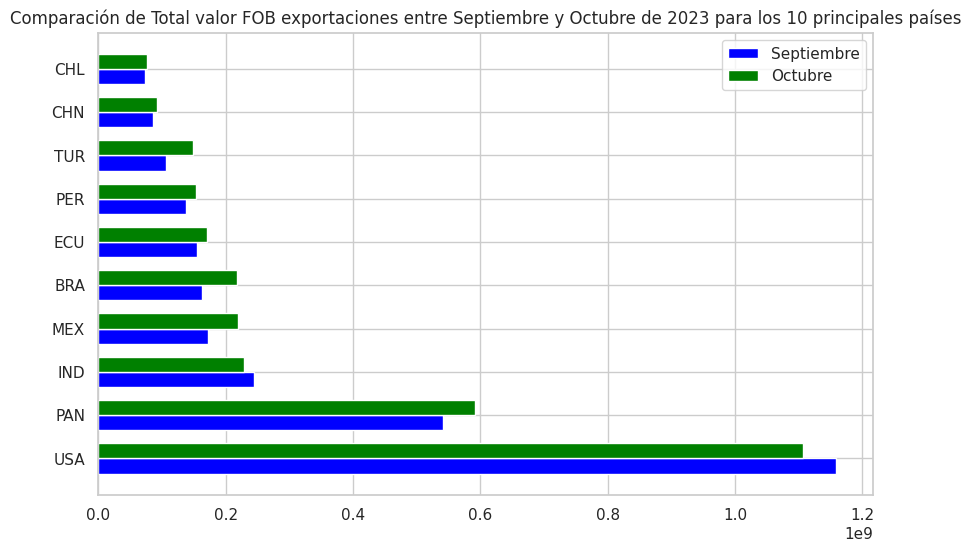

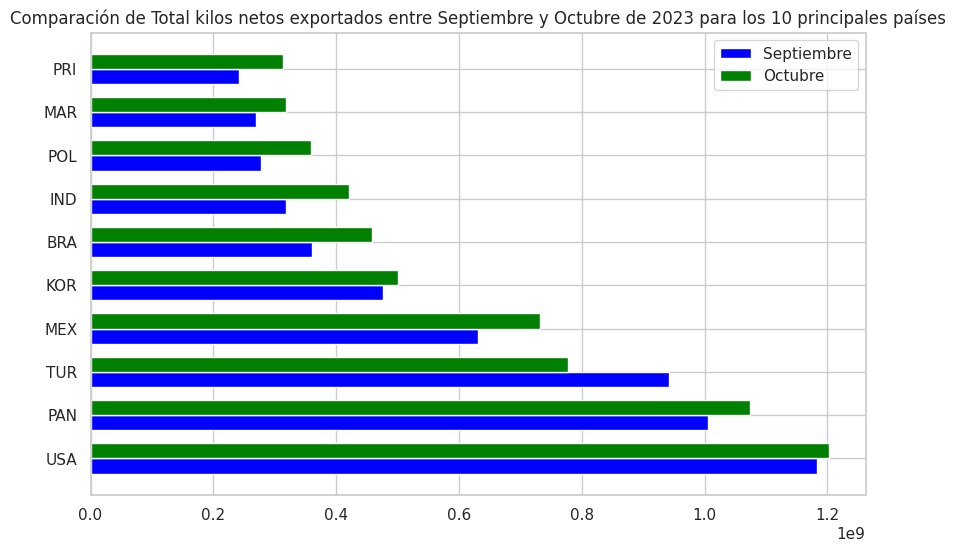

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurándonos de que los dataframes estén ordenados correctamente y resetear el índice
grouped_data_sept_sorted = grouped_data_sept.sort_values(by='Suma_FOBDOL', ascending=False).reset_index().head(10)
grouped_data_oct_sorted = grouped_data_oct.sort_values(by='Suma_FOBDOL', ascending=False).reset_index().head(10)

# Establecer un estilo para las gráficas
sns.set(style="whitegrid")

# Ancho de las barras en el gráfico
bar_width = 0.35

# Gráfica para FOBDOL
plt.figure(figsize=(10, 6))

# Crear un array con la posición de cada barra
y_positions = np.arange(len(grouped_data_sept_sorted))

# Dibujar las barras para septiembre y octubre
plt.barh(y_positions - bar_width/2, grouped_data_sept_sorted['Suma_FOBDOL'], bar_width, color='blue', label='Septiembre')
plt.barh(y_positions + bar_width/2, grouped_data_oct_sorted['Suma_FOBDOL'], bar_width, color='green', label='Octubre')

# Añadir etiquetas y título
plt.yticks(y_positions, grouped_data_sept_sorted['COD_PAI4'])
plt.title('Comparación de Total valor FOB exportaciones entre Septiembre y Octubre de 2023 para los 10 principales países')
plt.legend()

plt.show()

# Repetir el proceso para PNK
grouped_data_sept_sorted = grouped_data_sept.sort_values(by='Suma_PNK', ascending=False).reset_index().head(10)
grouped_data_oct_sorted = grouped_data_oct.sort_values(by='Suma_PNK', ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 6))

# Dibujar las barras para septiembre y octubre
plt.barh(y_positions - bar_width/2, grouped_data_sept_sorted['Suma_PNK'], bar_width, color='blue', label='Septiembre')
plt.barh(y_positions + bar_width/2, grouped_data_oct_sorted['Suma_PNK'], bar_width, color='green', label='Octubre')

# Añadir etiquetas y título
plt.yticks(y_positions, grouped_data_sept_sorted['COD_PAI4'])
plt.title('Comparación de Total kilos netos exportados entre Septiembre y Octubre de 2023 para los 10 principales países')
plt.legend()

plt.show()